In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [2]:
# plot settings

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set(context='talk')



In [3]:
def next_fib(num):
    """returns next fibonacci number"""
    if num == 0:
        return 0
    elif num == 1:
        return 1
    else:
        return next_fib(num-1) + next_fib(num-2)

def calc_fib(limit):
    """returns list of fibonacci sequence up to given limit"""   
    fib_list = []
    for idx in range(limit):
        fib_list.append(next_fib(idx))
    return fib_list
        
def calc_fib_ratio(limit, distance, fib_seq=None):
    """calculate fibonacci ratios of given distance
    * limit: up to index for which fibonacci sequence is calculated
    * distance : which ratio to calculate, eg
                 distance=1: fib(i)/fib(i+1),
                 distance=2: fib(i)/fib(i+2)
    * fib_seq: list of calculated fibonacci sequence available
    returns fibonacci ratio
    """    
    
    assert distance > 0, 'Provide distance parameter >0.'
    
    if fib_seq == 'None': # calculate fibonacci sequence if not provided as input
        fib_seq = calc_fib(limit)
    
    fib_array = np.array(fib_seq) # convert to array for later indexing
    
    return fib_array[:-distance] / fib_array[distance:]



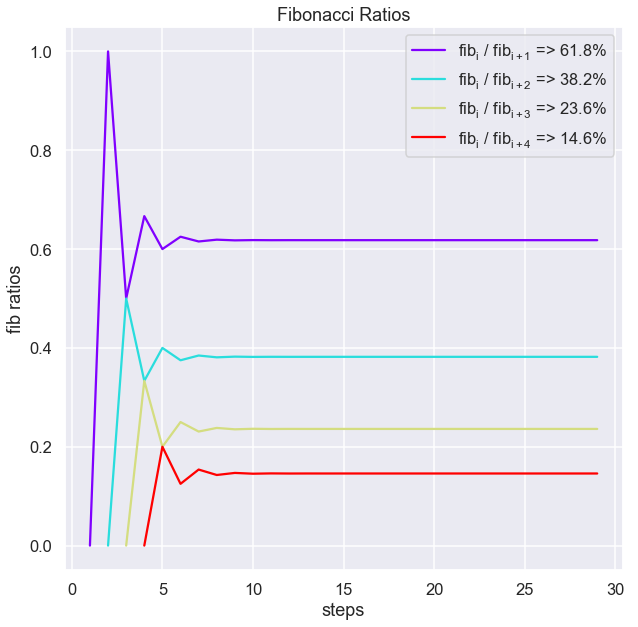

In [4]:
limit = 30
ratios = [1, 2, 3, 4] #calculate and plot first to fourth fibonacci ratio
colors = iter(cm.rainbow(np.linspace(0, 1, len(ratios)))) # select different colors for individual lines

fib_seq = calc_fib(limit) 

fig, ax = plt.subplots(figsize=(10,10))

# calculate fibonacci ratios and plot individually
for rat in ratios:
    rat_nums = calc_fib_ratio(limit, rat, fib_seq=fib_seq)
    
    ax.plot(range(rat, limit), rat_nums, color=next(colors), \
            label='$fib_{}$ / $fib_{{i+{}}}$ => {}%'.format('i', str(rat), np.round(100*rat_nums[-rat], 1)))
    ax.set_title('Fibonacci Ratios')
    ax.legend(loc='best')
    ax.set_xlabel('steps')
    ax.set_ylabel('fib ratios')    